### lasso也是为了消除多重共线性，但是和岭回归不同，lasso使用的是L1范式
### L1正则化可以将系数压缩到0，因此Lasso的主要应用并不是消除多重共线性，而是
### 进行特征选择

In [1]:
# 使用lasso做特征选择
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [2]:
housevalue = fch()

In [3]:
x = housevalue.data

In [4]:
x = pd.DataFrame(x)

In [5]:
y = housevalue.target

In [6]:
x.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [7]:
x

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
x.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=120)

In [10]:
# 每次分完测试集和训练集之后要记得恢复索引
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

In [11]:
# 分别用线性回归，岭回归和lasso进行拟合
# 首先用线性回归进行拟合
lr = LinearRegression().fit(x_train,y_train)
# 用.coef_查看系数，因为系数的值太小，因此这里乘以100，然后转化为列表方便查看
(lr.coef_*100).tolist()

[45.310170760962166,
 0.9608411868009503,
 -13.053683518663878,
 83.8140293731168,
 -0.0004380236974967326,
 -0.42257282308464805,
 -41.84663540292528,
 -43.204016532441926]

In [12]:
# 对岭回归进行拟合，这里的拟合使用的alpha=0，期望应该和线性回归获得同样的结果
ridge = Ridge(alpha=0).fit(x_train,y_train)
(ridge.coef_*100).tolist()

[45.3101707609621,
 0.9608411868009301,
 -13.053683518663792,
 83.81402937311651,
 -0.00043802369748959804,
 -0.42257282308464883,
 -41.846635402925415,
 -43.20401653244211]

In [13]:
# 对lasso（最小绝对收缩和选择算子）进行拟合，这里的alpha同样取0，此时应该和线性回归获得同样的结果
lasso = Lasso(alpha=0.2).fit(x_train,y_train)
(lasso.coef_*100).tolist()

[37.793431328921244,
 1.5659531087654257,
 -0.0,
 0.0,
 0.002102046055043671,
 -0.1628412888528827,
 -0.8325474144305034,
 -0.0]

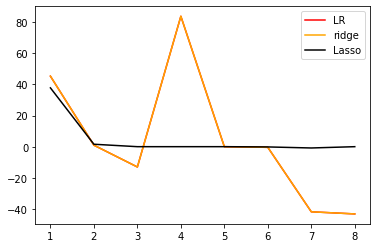

In [14]:
# 将系数进行绘图，
plt.plot(range(1,9),(lr.coef_*100).tolist(),c='red',label='LR')
plt.plot(range(1,9),(ridge.coef_*100).tolist(),c='orange',label='ridge')
plt.plot(range(1,9),(lasso.coef_*100).tolist(),c='black',label='Lasso')
plt.legend()
plt.show()

In [15]:
from sklearn.linear_model import LassoCV

In [16]:
# 手动建立alpha取值范围
alpha_range = np.logspace(-10,-2,200,base=10)
# 形成以10为底的指数函数，10**(-10)到10**(-2)

In [17]:
alpha_range

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [18]:
lasso_ = LassoCV(alphas=alpha_range
                , cv=5 # 交叉验证的折数
                ).fit(x_train,y_train)

In [19]:
lasso_.alpha_

0.0002967302408188873

In [20]:
# 调用所有交叉验证的结果
# lasso_.mse_path_

array([[0.54437699, 0.53573139, 0.52582747, 0.50768512, 0.50401704],
       [0.54357672, 0.53457349, 0.52494456, 0.50633983, 0.50317266],
       [0.54292904, 0.5335968 , 0.5242218 , 0.50518952, 0.502479  ],
       [0.5424079 , 0.53277958, 0.52363423, 0.50420423, 0.50192165],
       [0.54198832, 0.53209422, 0.52315832, 0.5033583 , 0.50147404],
       [0.54165307, 0.53152025, 0.52277455, 0.50263069, 0.50111713],
       [0.54138671, 0.53103799, 0.52246513, 0.50200355, 0.50083428],
       [0.5411765 , 0.53063296, 0.52221773, 0.5014619 , 0.50061177],
       [0.54101204, 0.53029189, 0.52202039, 0.50099309, 0.50043732],
       [0.54088462, 0.53000542, 0.52186445, 0.50058647, 0.50030355],
       [0.54078729, 0.52976368, 0.52174177, 0.50023312, 0.50020111],
       [0.54071419, 0.52955985, 0.52164648, 0.49992529, 0.50012529],
       [0.54066035, 0.52938814, 0.52157306, 0.49965655, 0.50006953],
       [0.54062218, 0.5292427 , 0.52151755, 0.4994216 , 0.50003093],
       [0.54059616, 0.52911987, 0.

In [21]:
lasso_.mse_path_.shape

(200, 5)

In [22]:
lasso_.mse_path_.mean(axis=1)
# 在岭回归中，axis=0但是这里的axis=1，原因是在岭回归中使用的是留一交叉验证，返回的结果是每一个
# 样本在每个alpha下的交叉验证的结果，因此要求每个alpha下的均值就是axis=0，跨行计算
# 但是在lasso中返回的是每一个alpha下的交叉验证的结果，因此要求每个alpha下的均值，就是求axis=1
# 跨列求和

array([0.5235276 , 0.52252145, 0.52168323, 0.52098952, 0.52041464,
       0.51993914, 0.51954553, 0.51922017, 0.51895095, 0.5187289 ,
       0.51854539, 0.51839422, 0.51826953, 0.51816699, 0.51808254,
       0.51801316, 0.51795636, 0.51790975, 0.51787162, 0.51784046,
       0.51781516, 0.51779455, 0.51777785, 0.51776437, 0.51775352,
       0.51774483, 0.51773793, 0.51773242, 0.51772808, 0.51772471,
       0.51772212, 0.51772016, 0.51771869, 0.51771763, 0.51771689,
       0.5177164 , 0.51771611, 0.51771598, 0.51771596, 0.51771605,
       0.5177162 , 0.51771639, 0.51771662, 0.51771687, 0.51771713,
       0.51771741, 0.51771767, 0.51771794, 0.5177182 , 0.51771846,
       0.5177187 , 0.51771893, 0.51771915, 0.51771935, 0.51771954,
       0.51771972, 0.51771989, 0.51772005, 0.5177202 , 0.51772033,
       0.51772045, 0.51772057, 0.51772068, 0.51772077, 0.51772086,
       0.51772095, 0.51772102, 0.51772109, 0.51772116, 0.51772122,
       0.51772127, 0.51772132, 0.51772137, 0.51772141, 0.51772

In [23]:
# 最佳正则化系数下获得的模型的系数结果
lasso_.coef_

array([ 4.51805716e-01,  9.62580889e-03, -1.28088430e-01,  8.24495018e-01,
       -4.31937935e-06, -4.22741699e-03, -4.18148981e-01, -4.31532199e-01])

In [24]:
lasso_.score(x_test,y_test)

0.5809136739722959

In [26]:
# 使用lasso自带的正则化路径长度和路径中的alpha个数来自动建立alpha的选择范围
ls_ = LassoCV(eps=0.00001
             , n_alphas=300
             , cv=5
             ).fit(x_train,y_train)

In [27]:
ls_.alpha_

0.000333857162673231

In [28]:
ls_.alphas_

array([3.33857163e+01, 3.21246415e+01, 3.09112012e+01, 2.97435960e+01,
       2.86200947e+01, 2.75390312e+01, 2.64988026e+01, 2.54978664e+01,
       2.45347385e+01, 2.36079907e+01, 2.27162489e+01, 2.18581907e+01,
       2.10325438e+01, 2.02380840e+01, 1.94736332e+01, 1.87380580e+01,
       1.80302675e+01, 1.73492123e+01, 1.66938825e+01, 1.60633065e+01,
       1.54565491e+01, 1.48727107e+01, 1.43109255e+01, 1.37703606e+01,
       1.32502144e+01, 1.27497156e+01, 1.22681221e+01, 1.18047198e+01,
       1.13588215e+01, 1.09297660e+01, 1.05169173e+01, 1.01196630e+01,
       9.73741414e+00, 9.36960394e+00, 9.01568699e+00, 8.67513850e+00,
       8.34745351e+00, 8.03214613e+00, 7.72874882e+00, 7.43681170e+00,
       7.15590188e+00, 6.88560284e+00, 6.62551377e+00, 6.37524902e+00,
       6.13443748e+00, 5.90272210e+00, 5.67975927e+00, 5.46521839e+00,
       5.25878134e+00, 5.06014201e+00, 4.86900586e+00, 4.68508947e+00,
       4.50812013e+00, 4.33783544e+00, 4.17398289e+00, 4.01631953e+00,
      